# core

> Fill in a module description here

In [72]:
#| default_exp core

In [73]:
#| hide
from nbdev.showdoc import *


In [74]:
#| export
import matplotlib.pyplot as plt
from sympy import symbols, Eq, solve, diff, integrate, parse_expr
import sympy
import numpy as np
import random
import math
import pandas as pd


In [75]:
#| export
class Free_market:
    def __init__(self, supply, demand) -> None:
        self.supply = supply
        self.demand = demand
        
    
    def __str__(self):
        return str(self.__class__) + ": " + str(self.__dict__)
    
    def get_graph(self, complete: bool = False) -> None:
        print("cannot multiply variables with zero")
        price = self.get_price()
        quantity = self.get_quantity()
        
        start = 0
        if "x" in self.demand:
            end = math.floor(self.get_zero_point(self.demand))
        else:
            end = 1.5 * math.floor(quantity)
        step = 1 
        

        if "x" in self.supply:
            supply_dict = self.get_calculate_values(self.supply, end)
            supply_curve = sorted(list(supply_dict.values()) + [float(price)])
            #supply_curve_domain = sorted(list(supply_dict.keys()) + [float(quantity)]) 
            supply_dict[quantity] = price


            #supply_curve_plot = plt.plot(supply_dict.keys(), supply_dict.values(), label = "Supply") 
            plt.plot(supply_dict.keys(), supply_dict.values(), label = "Supply") 
            
        else:
            supply_list = [float(price) for i in range(start, math.ceil(end), step)] + [float(price)]
            supply_curve = supply_list

            
            #supply_curve_plot = plt.plot(supply_curve, label = "Supply") 
            plt.plot(supply_curve, label = "Supply") 
            
        
        if "x" in self.demand:
            demand_dict = self.get_calculate_values(self.demand, end)
            demand_dict[quantity] =  price
            demand_curve = list(demand_dict.values()) + [float(price)]
            #demand_curve_domain = sorted(list(demand_dict.keys()) + [float(quantity)]) 

            #demand_curve_plot = plt.plot(demand_dict.keys(),demand_dict.values(), label = "Demand") 
            plt.plot(demand_dict.keys(),demand_dict.values(), label = "Demand") 
            
        else:
            demand_list = [float(price) for i in range(start, math.ceil(end), step)]
            demand_curve = demand_list + [float(price)]
            #demand_curve_plot = plt.plot(demand_curve, label = "Demand") 
            plt.plot(demand_curve, label = "Demand") 
            

        plt.xlabel("Quantity")
        plt.ylabel("Price")
        
        if complete == True:
            
            x_range = [i for i in range(0, math.floor(quantity))] + [float(quantity)]
            if len(x_range) <= 1:
                x_range = [i for i in range(0, math.ceil(quantity))] + [float(quantity)]

            y_range = [i for i in range(0, math.floor(price))] + [float(price)]
            if len(y_range) <= 1:
                y_range = [i for i in range(0, math.ceil(price))] +[float(price)]


            price_curve = np.array([price for i in range(len(x_range))], dtype=float) 
            quantum_curve = np.array([quantity for i in range(len(y_range))], dtype=float) 
            
            plt.plot(x_range,                              # x [i for i in range(len(price_curve))],
                                            price_curve,                         # y
                                            linestyle = "dashed", label = f"Price*: {price}")
            
            plt.plot(quantum_curve,                             # x 
                                        y_range,                                   # y [i for i in range(len(quantum_curve))]
                                        linestyle = "dashed", label = f"Quantity*: {quantity}")
            
            

            if "x" in self.supply:
                price_curve = np.array(price_curve)
                supply_curve = np.array(supply_curve[0:len(price_curve) -1] + [float(price)])  

                x_range = np.array(x_range)

                # Create a valid boolean array for the 'where' condition
                condition = supply_curve[0:len(price_curve)]  <= price_curve

                producer_surplus_plot = plt.fill_between(x_range, supply_curve, price_curve, where = condition, color = "silver", alpha=0.9) # producer surplus

                x_mid = np.quantile(x_range, 0.2)
                y_mid = np.quantile([np.min(supply_curve[condition]), np.max(price_curve[condition])], 0.8)

                plt.text(x_mid, y_mid, "P.S")

            if "x" in self.demand:
                price_curve = np.array(price_curve)
                demand_curve = np.array(demand_curve[0:len(price_curve)  - 1] + [float(price)])  

                x_range = np.array(x_range)

                condition = demand_curve[0:len(price_curve)] >= price_curve

                consumer_surplus_plot = plt.fill_between(x_range, demand_curve, price_curve, where = condition, color = "purple", alpha=0.9) # consumer surplus

                x_mid = np.quantile(x_range, 0.2)
                y_mid = np.quantile([np.min(price_curve[condition]), np.max(demand_curve[condition])], 0.2)

                plt.text(x_mid, y_mid, "C.S")

        

        plt.legend()
        plt.show()


    def get_calculate_values(self, expression: str, end: int) -> dict:
        start = 0
        step = 1 

        quantity = end
        end = math.ceil(end)

        value_pairs = {}
        equation_function = self.create_equation_function(expression)

        
        if equation_function:
            #value_pairs[x_val] = result """
            if end <= 1:
                x_values = sorted([i for i in range(start, end, step)] + [quantity])

                for x_val in x_values:
                    result = float(equation_function(x_val))
                    value_pairs[x_val] = result
                result = float(equation_function(quantity))

                value_pairs[x_val] = result


            else:
                x_values = sorted([i for i in range(start, end, step)] + [quantity])
                for x_val in x_values:
                    result = float(equation_function(x_val))
                    value_pairs[x_val] = result
                
                
               # print(f"For x = {x_val}, the result is {result}")

        else:
            print("Error: Unable to create the equation function.")
        return value_pairs    
    

    def create_equation_function(self, equation_str: str) -> str:
        x = symbols('x')
        
        try:
            equation = parse_expr(equation_str)
            equation_function = lambda x_val: equation.subs(x, x_val)
            return equation_function
        except Exception as e:
            return None


    def get_zero_point(self, expression: str) -> float:
        x = symbols('x')
        
        # Create the equation from the supply and demand functions
        equation = parse_expr(expression)
        
        # Calculate the equilibrium price and quantity
        solutions = solve(equation, x)
        if solutions:
            zero_point = solutions[0]
            #print(f"zero_points {zero_point}")
            return zero_point
        else:
            zero_point = self.get_price(self.supply, self.demand)
            return zero_point + round(0.1*zero_point, 0)
    
    
    def get_quantity(self) -> float:
        x = symbols('x')
        
        # Create the equation from the supply and demand functions
        supply_eq = parse_expr(self.supply)
        demand_eq = parse_expr(self.demand)
        
        # Calculate the equilibrium price and quantity
        quantity = max(solve(Eq(supply_eq, demand_eq), x))
        #print(quantity)
        return quantity
    

    def get_price(self) -> float:
        x = symbols('x')
        quantity = self.get_quantity()
        
        if "x" in self.demand:
            end = self.get_zero_point(self.demand)
        else:
            end = 2 * quantity
        
        equation_function = self.create_equation_function(self.demand)
        
        
        if "x" not in self.supply:
            price = float(self.supply)
        elif "x" not in self.demand:
            price = float(self.demand)
        else:
            price = equation_function(quantity)
             
        #print(f"price is around {round(price, 3)}")
        return price


    def get_consumer_surplus(self) -> float:
        x, y = symbols('x y')
        
        
        # Calculate the equilibrium price and quantity
        price = self.get_price()
        quantity = self.get_quantity()
        
        # Define the inverse demand function (price as a function of quantity)
        consumer_surplus = parse_expr(f"{self.demand}-{price}")
        
        # Calculate consumer surplus
        surplus = sympy.integrate(consumer_surplus, (x, 0, quantity)) 
        
        return surplus
    

    def get_producer_surplus(self) -> float:
        x, y = symbols('x y')
        
        # Create the equation from the supply and demand functions
        supply_eq = parse_expr(self.supply)
        demand_eq = parse_expr(self.demand)
        
        # Calculate the equilibrium price and quantity
        price = self.get_price()
        quantity = self.get_quantity()
                
        
        #producer_surplus = parse_expr(f"{price}-{self.supply}")
        price_line = sympy.integrate(parse_expr(f"{price}"), (x, 0, quantity))
        supply_curve = sympy.integrate(parse_expr(self.supply), (x, 0, quantity))

        
            
        
        # Calculate consumer surplus
        surplus = price_line - supply_curve
        
        return surplus


    def get_economic_surplus(self) -> float:
        consumer = self.get_consumer_surplus()
        producer = self.get_producer_surplus()
        economic_surplus = consumer + producer
        return economic_surplus
    



supply function 0 + 1 * x
demand function 10 - 1 * x
cannot multiply variables with zero


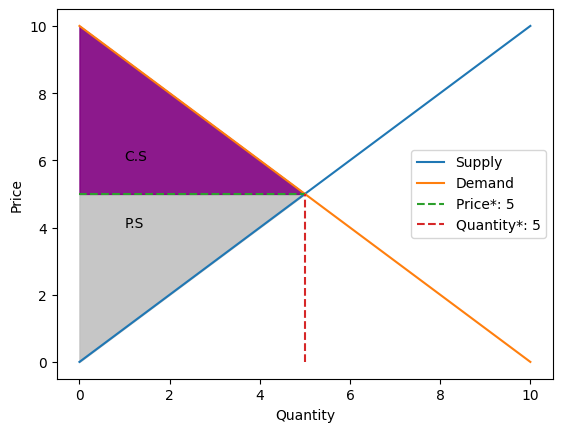

In [76]:
supply_function = f"{0} + {1} * x"
demand_function = f"{10} - {1} * x"
free_market = Free_market(supply_function, demand_function)


print(f"supply function {supply_function}\ndemand function {demand_function}")
free_market.get_graph(complete=True)

In [77]:
#| export
class Monopoly(Free_market):
    def __init__(self, supply, demand) -> None:
        super().__init__(supply, demand)

    def __str__(self):
        return str(self.__class__) + ": " + str(self.__dict__)
            
    def get_graph(self,complete = False) -> None:
        x = symbols('x')
        income = parse_expr(f"({self.demand}) * x")
        marginal_cost = self.supply
        marginal_revenue = diff(income, x)
        marginal_cost, marginal_revenue =str(marginal_cost), str(marginal_revenue)
        supply, demand =str(self.supply), str(self.demand)
        price = self.get_price()
        quantity = self.get_quantity()
        end = self.get_zero_point(self.demand)
        mc = self.get_calculate_values(marginal_cost, end)
        mr = self.get_calculate_values(marginal_revenue, end)
        mr_graph = {}
        for key in mr.keys():
            if mr[key] >= 0:
                mr_graph[key] = mr[key]
              

        supply_dict = self.get_calculate_values(supply, end)
        demand_dict = self.get_calculate_values(demand, end)

        if complete == True:
            x_range = [i for i in range(0, math.floor(quantity))] + [float(quantity)]
            if len(x_range) <= 1:
                x_range = [i for i in range(0, math.ceil(quantity))] + [float(quantity)]

            y_range = [i for i in range(0, math.floor(price))] + [float(price)]
            if len(y_range) <= 1:
                y_range = [i for i in range(0, math.ceil(price))] +[float(price)]


            price_curve = np.array([price for i in range(len(x_range))], dtype=float) 
            quantum_curve = np.array([quantity for i in range(len(y_range))], dtype=float) 

            plt.plot(x_range, price_curve, linestyle = "dashed", label = f"Price*: {round(price,2)}")
            plt.plot(quantum_curve,y_range, linestyle = "dashed", label = f"Quantity*: {round(quantity,2)}")
            
           
            # Producer surplus code
            mc_values = [mc[str(x)] if str(x) in mc else mc[round(x)] for x in x_range]  # Ensure mc values are aligned with x_range
            mc_array = np.array(mc_values, dtype=float)
            condition = mc_array  <= list(price_curve)
            producer_surplus_plot = plt.fill_between(x_range, mc_array, price_curve, where = condition, color = "silver", alpha=0.9) # producer surplus
            x_mid = np.quantile(x_range, 0.2)
            y_mid = np.quantile([np.min(mc_array[condition]), np.max(price_curve)], 0.8)
            plt.text(x_mid, y_mid, "P.S")


            # Consumer surplus code
            demand_array = np.array(list(demand_dict.values())[0:len(price_curve)], dtype=float)
            condition = demand_array >= list(price_curve)
            consumer_surplus_plot = plt.fill_between(x_range, demand_array, price_curve, where = condition, color = "purple", alpha=0.9) # consumer surplus
            x_mid = np.quantile(x_range, 0.2)
            y_mid = np.quantile([np.min(price_curve), np.min(demand_array[condition])], 0.8)
            plt.text(x_mid, y_mid, "C.S")

            # Dead weight loss code
            start_dwl = round(quantity) + 1
            price_free_market = solve(f"{self.demand}-{self.supply}", x)[0]
            dead_loss_x_range = [float(quantity)] + [i for i in range(start_dwl, round(price_free_market)+1)]
            mc_array = np.array([mc[str(x)] if str(x) in mc else mc[round(x)] for x in dead_loss_x_range], dtype=float)
            print(demand_dict, dead_loss_x_range)
            demand_array = np.array([demand_dict[round(i)] for i in dead_loss_x_range], dtype=float)
            condition = demand_array >= mc_array
            print(f"dead_loss_x_range is: {dead_loss_x_range}\ndemand_array is: {demand_array}\nmc_array is: {mc_array}, price_free_market is: {price_free_market}")
            dead_loss_plot = plt.fill_between(dead_loss_x_range, demand_array, mc_array, where = condition, color = "red", alpha=0.9) # dead loss
            x_mid = np.quantile(dead_loss_x_range, 0.2)
            y_mid = np.quantile(price_free_market, 1)
            plt.text(x_mid, y_mid, "DWL")


        plt.plot(mc.keys(),mc.values(), label = "Marginal Cost") 
        plt.plot(mr_graph.keys(),mr_graph.values(), label = "Marginal Revenue") 

        
        plt.plot(demand_dict.keys(), demand_dict.values(), label = "Demand")

        plt.xlabel("Quantity")
        plt.ylabel("Price")

        plt.legend() 
        plt.show()

    def get_quantity(self) -> float:
        x = symbols('x')
        
        # Create the equation from the supply and demand functions
        mc = parse_expr(self.supply)
        revenue_eq = parse_expr(f"({self.demand})*(x)")
        mr = diff(revenue_eq, x)


        
        # Calculate the equilibrium price and quantity
        quantity = max(solve(Eq(mc, mr), x))
        #print(quantity)
        return quantity
    
    def get_price(self) -> float:
        x = symbols('x')
        quantity = self.get_quantity()
        mc = parse_expr(self.supply)
        revenue_eq = parse_expr(f"({self.demand})*(x)")
        mr = diff(revenue_eq, x)
        
    
        equation_function = self.create_equation_function(str(self.demand))
        
        
        if "x" not in str(mc):
            price = float(mc)
        elif "x" not in str(mr):
            price = float(mr)
        else:
            price = equation_function(quantity)
             
        #print(f"price is around {round(price, 3)}")
        return price

    


{0: 10.0, 1: 9.0, 2: 8.0, 3: 7.0, 4: 6.0, 5: 5.0, 6: 4.0, 7: 3.0, 8: 2.0, 9: 1.0, 10: 0.0} [3.3333333333333335, 4, 5]
dead_loss_x_range is: [3.3333333333333335, 4, 5]
demand_array is: [7. 6. 5.]
mc_array is: [3. 4. 5.], price_free_market is: 5


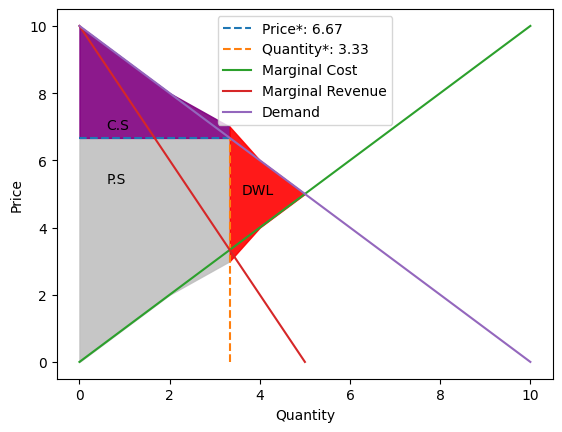

In [78]:
supply = "x"
demand = "10 -  x"
monopoly = Monopoly(supply, demand)
monopoly.get_graph(complete=True)

In [79]:

consumer_surplus_free_market = free_market.get_consumer_surplus()
consumer_surplus_monopoly = monopoly.get_consumer_surplus()

print(f"Consumer Surplus free market:  {round(consumer_surplus_free_market)}\n"
    +f"Consumer Surplus monopoly: {round(consumer_surplus_monopoly)}")

producer_surplus_free_market = free_market.get_producer_surplus()
producer_surplus_monopoly = monopoly.get_producer_surplus()

print(f"Producer Surplus free market: {round(producer_surplus_free_market)}\n"
    +f"Producer Surplus monopoly: {round(producer_surplus_monopoly)}")

economic_surplus_free_market = free_market.get_economic_surplus()
economic_surplus_monopoly = monopoly.get_economic_surplus()

print(f"Economic Surplus free market: {round(economic_surplus_free_market)}\n"
    +f"Economic Surplus monopoly: {round(economic_surplus_monopoly)}")

Consumer Surplus free market:  12
Consumer Surplus monopoly: 6
Producer Surplus free market: 12
Producer Surplus monopoly: 17
Economic Surplus free market: 25
Economic Surplus monopoly: 22


In [80]:
price_free_market = free_market.get_price()
price_monopoly = monopoly.get_price()

print(f"Price free market: {round(price_free_market)}\n"
      +f"Price monopoly: {round(price_monopoly)}")

quantity_free_market = free_market.get_quantity()
quantity_monopoly = monopoly.get_quantity()

print(f"Quantity free market: {round(quantity_free_market)}\n"
        +f"Quantity monopoly: {round(quantity_monopoly)}")

Price free market: 5
Price monopoly: 7
Quantity free market: 5
Quantity monopoly: 3


In [81]:
#| export
class Game:

    def __init__(self, player_1: dict, player_2: dict) -> None:
        self.player_1 = player_1
        self.player_2 = player_2

    def __str__(self) -> str:
        return str(self.__class__) + ": " + str(self.__dict__)
    
    def find_nash_equilibriums(self):
        cc = (self.player_1["cooperate-cooporate"], self.player_2["cooperate-cooporate"])
        cd = (self.player_1["cooperate-defect"], self.player_2["cooperate-defect"])
        dc = (self.player_1["defect-cooporate"], self.player_2["defect-cooporate"])
        dd = (self.player_1["defect-defect"], self.player_2["defect-defect"])

        nash_equilibriums = []

        if cc[0] >= dc[0] and cc[1] >= cd[1]:
            nash_equilibriums.append(("Cooperate", "Cooperate"))
        if cc[1] >= dc[1] and cd[0] >= cc[0]:
            nash_equilibriums.append(("Cooperate", "Defect"))
        if dc[0] >= cc[0] and dc[1] >= cc[1]:
            nash_equilibriums.append(("Defect", "Cooperate"))
        if dd[0] >= cd[0] and dd[1] >= cd[1]:
            nash_equilibriums.append(("Defect", "Defect"))

        return nash_equilibriums

    def print_game_matrix(self) -> None:
        matrix = pd.DataFrame([
            [self.player_1["cooperate-cooporate"], self.player_1["cooperate-defect"]],
            [self.player_1["defect-cooporate"], self.player_1["defect-defect"]]
        ], columns=["Cooperate", "Defect"], index=["Cooperate", "Defect"])

        
        matrix = matrix.astype(str) + ", " + pd.DataFrame([
            [self.player_2["cooperate-cooporate"], self.player_2["cooperate-defect"]],
            [self.player_2["defect-cooporate"], self.player_2["defect-defect"]]
        ], columns=["Cooperate", "Defect"], index=["Cooperate", "Defect"]).astype(str)

        print(matrix)



In [82]:

player_1 = {
    "cooperate-cooporate": 3,
    "cooperate-defect": 0,
    "defect-cooporate": 5,
    "defect-defect": -1
}
player_2 = {
    "cooperate-cooporate": 3,
    "cooperate-defect": 5,
    "defect-cooporate": 0,
    "defect-defect": -1
}
game = Game(player_1, player_2)
game.print_game_matrix()
nash_equilibriums = game.find_nash_equilibriums()
print("Nash Equilibriums:", nash_equilibriums)

          Cooperate  Defect
Cooperate      3, 3    0, 5
Defect         5, 0  -1, -1
Nash Equilibriums: []


In [83]:
#| hide
import nbdev; nbdev.nbdev_export()